In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [160]:
df=pd.read_csv('kidney_disease.csv')

In [161]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [162]:
df.shape

(400, 26)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [164]:
# we can drop id column because there are no pattern in the id column it will the constant
df.drop('id', axis=1, inplace=True)

In [165]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [166]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [167]:
 # the column name are non senseable so changingg the column name

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [168]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [169]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [170]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [172]:
df['packed_cell_volume']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

In [173]:
df['packed_cell_volume'].isnull().sum()

70

In [174]:
# df['packed_cell_volume'].astype(int)

# we can't convert by this way because there are present 70 null values so use this method at this time: 

df['packed_cell_volume']=pd.to_numeric(df['packed_cell_volume'], errors='coerce')

#errors='coerce':  Specifies how to handle errors during the conversion.
# When errors='coerce', any values that cannot be converted to numeric (e.g., non-numeric strings) will be set to NaN (Not a Number).

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [176]:
df['white_blood_cell_count']

0      7800
1      6000
2      7500
3      6700
4      7300
       ... 
395    6700
396    7800
397    6600
398    7200
399    6800
Name: white_blood_cell_count, Length: 400, dtype: object

In [177]:
df['white_blood_cell_count'].isnull().sum()

105

In [178]:
df['red_blood_cell_count']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red_blood_cell_count, Length: 400, dtype: object

In [179]:
df['red_blood_cell_count'].isnull().sum()

130

In [180]:
df['white_blood_cell_count']=pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

In [181]:
df['red_blood_cell_count']=pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [182]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [183]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']

In [184]:
num_cols=[col for col in df.columns if df[col].dtype!='object']

In [185]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [186]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [187]:
# unique values for each categorical colums

for col in cat_cols: 
    print(f"{col} has {df[col].unique()} unique values \n")

red_blood_cells has [nan 'normal' 'abnormal'] unique values 

pus_cell has ['normal' 'abnormal' nan] unique values 

pus_cell_clumps has ['notpresent' 'present' nan] unique values 

bacteria has ['notpresent' 'present' nan] unique values 

hypertension has ['yes' 'no' nan] unique values 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] unique values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] unique values 

appetite has ['good' 'poor' nan] unique values 

peda_edema has ['no' 'yes' nan] unique values 

aanemia has ['no' 'yes' nan] unique values 

class has ['ckd' 'ckd\t' 'notckd'] unique values 



In [188]:
# replace unwaanted values(diabetes_mellitus )

df['diabetes_mellitus'].replace(to_replace={' yes':'yes', '\tyes':'yes','\tno': 'no'}, inplace=True)

In [189]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [190]:
df['coronary_artery_disease']=df['coronary_artery_disease'].replace(to_replace='\tno', value='no')

In [191]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [192]:
df['class'].replace(to_replace={'ckd\t':'ckd'}, inplace=True)

In [193]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [194]:
df['class']

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: class, Length: 400, dtype: object

In [195]:
df['class']=df['class'].map({'ckd':1, 'notckd':0})

In [196]:
df['class'].unique()

array([1, 0], dtype=int64)

In [197]:
df['class'].value_counts()
# class 1: having cronic kidney disease
# class 0: not having cronic kidney disease

class
1    250
0    150
Name: count, dtype: int64

In [198]:
for col in cat_cols: 
    print(f"{col} has {df[col].unique()} unique values \n")

red_blood_cells has [nan 'normal' 'abnormal'] unique values 

pus_cell has ['normal' 'abnormal' nan] unique values 

pus_cell_clumps has ['notpresent' 'present' nan] unique values 

bacteria has ['notpresent' 'present' nan] unique values 

hypertension has ['yes' 'no' nan] unique values 

diabetes_mellitus has ['yes' 'no' nan] unique values 

coronary_artery_disease has ['no' 'yes' nan] unique values 

appetite has ['good' 'poor' nan] unique values 

peda_edema has ['no' 'yes' nan] unique values 

aanemia has ['no' 'yes' nan] unique values 

class has [1 0] unique values 



In [199]:
# univariate analysis

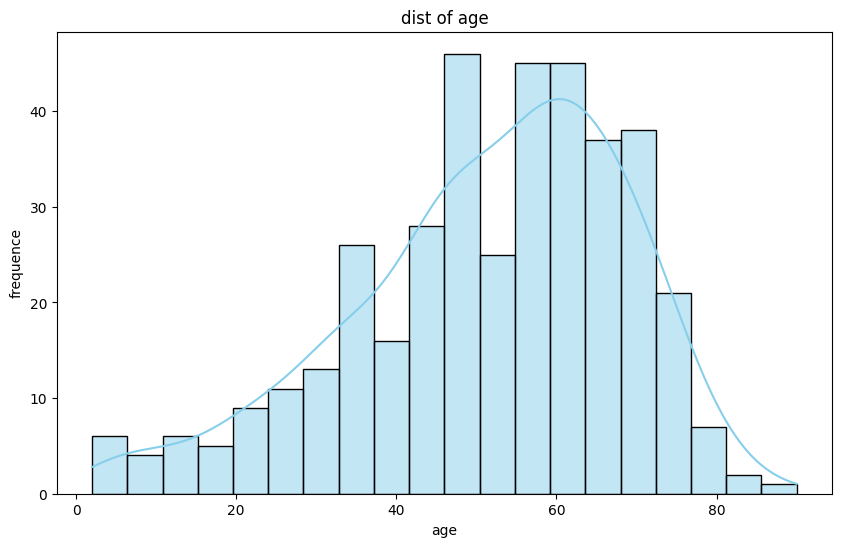

In [200]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('dist of age')
plt.xlabel('age')
plt.ylabel('frequence')
plt.show()

In [201]:
# insights>> dis of age is right skewed 

In [202]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='count'>

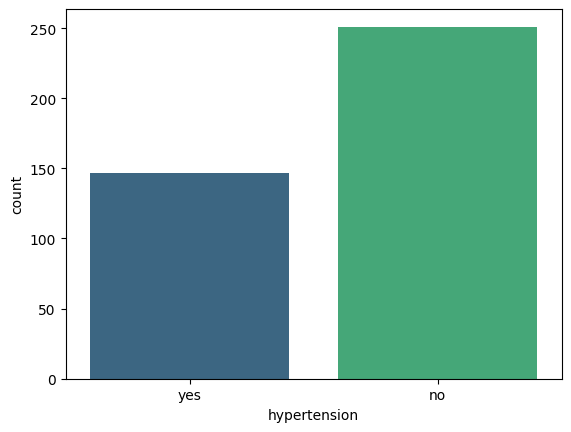

In [203]:
sns.countplot(x='hypertension', data=df, palette='viridis')

# Hypertension (high blood pressure) is when the pressure in your blood vessels is too high (140/90 mmHg or higher). 

In [204]:
# insights>> 150 of them has hypertesion

In [205]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [206]:
df['class']

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

<Axes: xlabel='class', ylabel='blood_urea'>

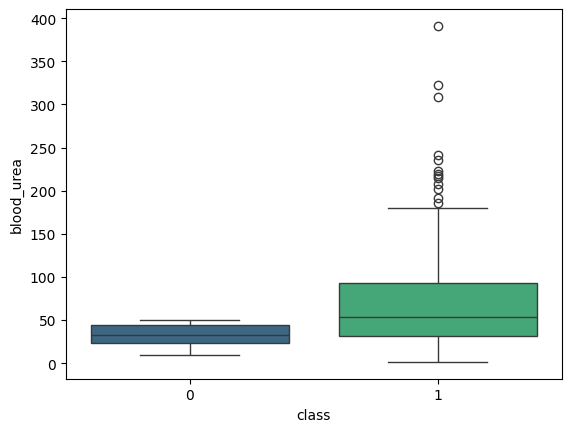

In [207]:
sns.boxplot(x='class', y='blood_urea', data=df, palette='viridis')

#Overview. A common blood test, the blood urea nitrogen (BUN) test reveals important information about how well your kidneys are working.

In [208]:
# insights>> outliers present in class 1(having ckd)
#            and median of class 1 is high as compare to class 0(not having ckd)

In [209]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='class', ylabel='serum_creatinine'>

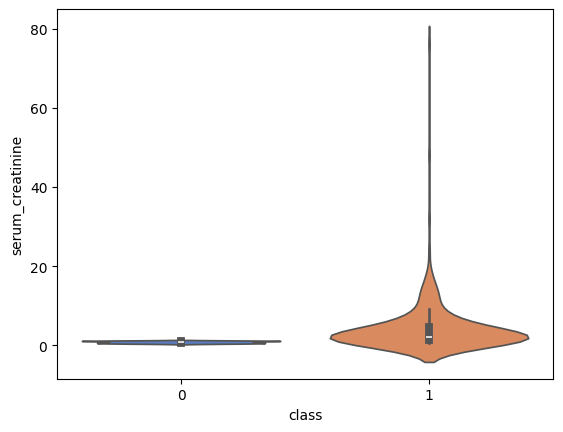

In [210]:
sns.violinplot(x='class', y='serum_creatinine', data=df, palette='muted')

#Serum creatinine; Kidney function - creatinine; Renal function - creatinine. The creatinine blood test measures the level of creatinine in the blood. This test is done to see how well your kidneys are working. Creatinine in the urine can be measured with a urine test.

<Axes: xlabel='class', ylabel='serum_creatinine'>

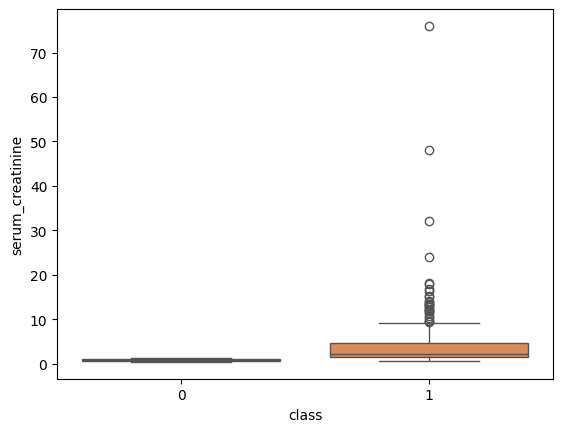

In [211]:
sns.boxplot(x='class', y='serum_creatinine', data=df, palette='muted')


In [212]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='aanemia', ylabel='count'>

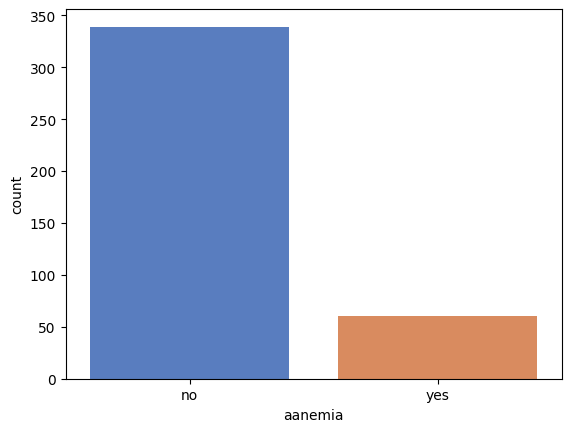

In [213]:
sns.countplot(x='aanemia', data=df, palette='muted')
#Overview. Anemia is a problem of not having enough healthy red blood cells or hemoglobin to carry oxygen to the body's tissues.

In [214]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [215]:
df.appetite.value_counts()

appetite
good    317
poor     82
Name: count, dtype: int64

<Axes: ylabel='count'>

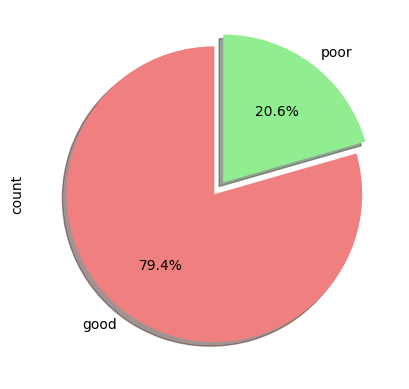

In [216]:
df.appetite.value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], explode=(0,0.1), startangle=90, shadow=True)

In [217]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='pus_cell_clumps', ylabel='count'>

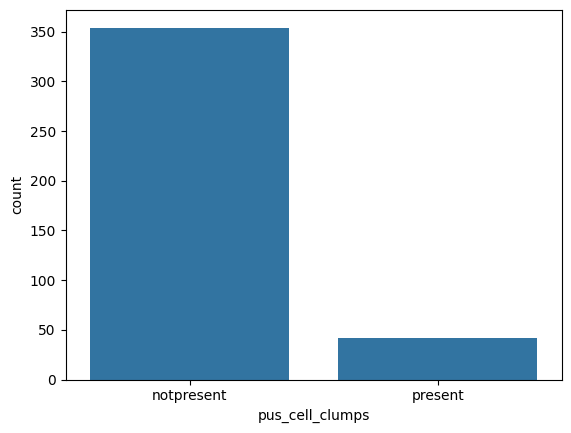

In [218]:
sns.countplot(x='pus_cell_clumps', data=df)

#Pus cells are a collection of dead, white blood cells that accumulates when the body's immune system activates in response to an infection. 

In [219]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

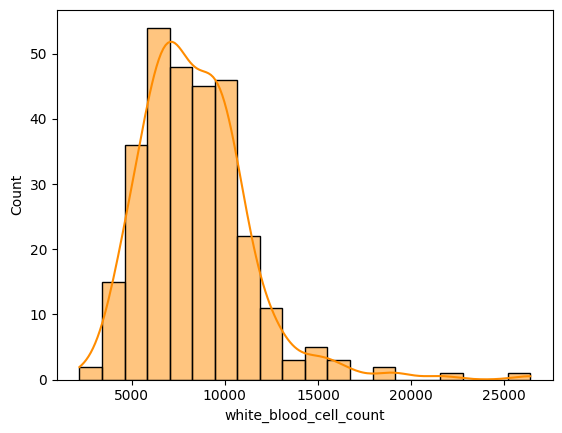

In [220]:
sns.histplot(df['white_blood_cell_count'].dropna(), bins=20, kde=True, color='darkorange')

<Axes: ylabel='count'>

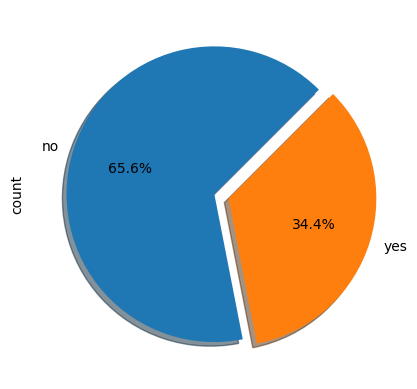

In [221]:
df['diabetes_mellitus'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle=45)

<Axes: ylabel='count'>

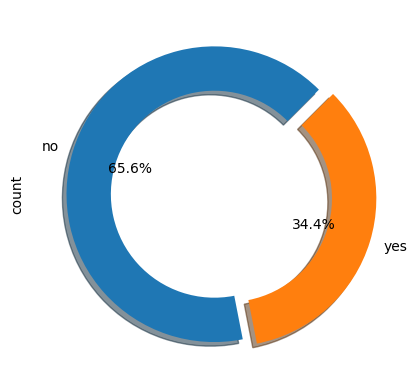

In [222]:
df['diabetes_mellitus'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle=45, wedgeprops=dict(width=0.3))

In [223]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

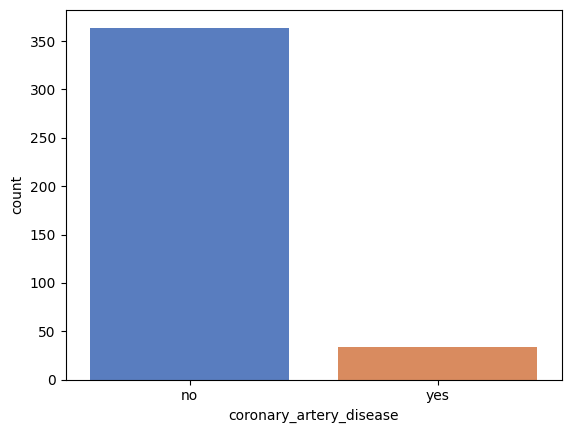

In [224]:
sns.countplot(x='coronary_artery_disease', data=df, palette='muted')
#oronary artery disease, also called CAD, is a condition that affects your heart. It is the most common heart disease in the United States. CAD happens when coronary arteries struggle to supply the heart with enough blood, oxygen and nutrients. Cholesterol deposits, or plaques, are almost always to blame

<Axes: xlabel='peda_edema', ylabel='count'>

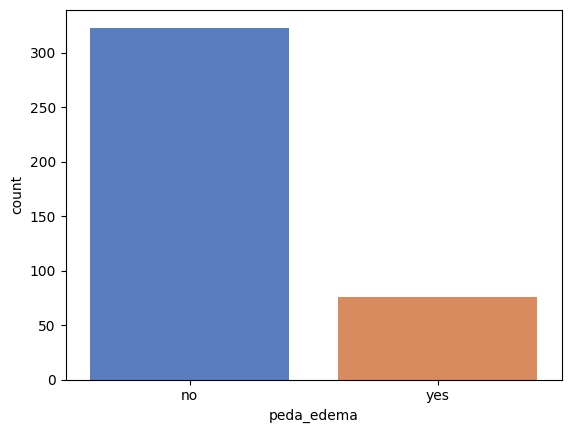

In [225]:
sns.countplot(x='peda_edema', data=df, palette='muted')

In [226]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='bacteria', ylabel='count'>

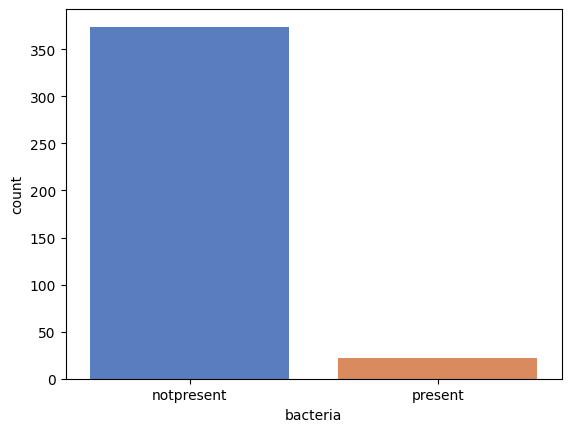

In [227]:
sns.countplot(x='bacteria', data=df, palette='muted')

In [228]:
# bivariate analysis

<Axes: xlabel='age', ylabel='blood_pressure'>

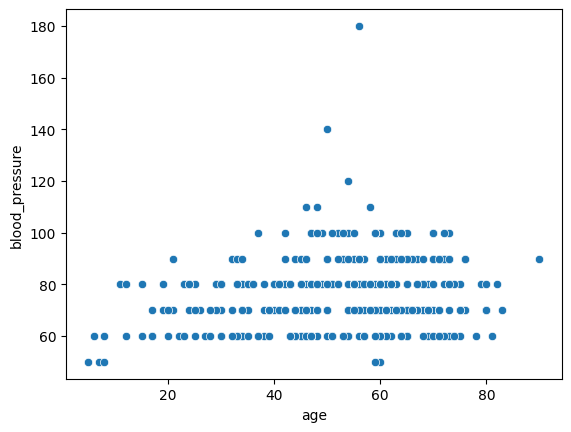

In [229]:
sns.scatterplot(x='age', y='blood_pressure', data=df)

<Axes: xlabel='age', ylabel='blood_pressure'>

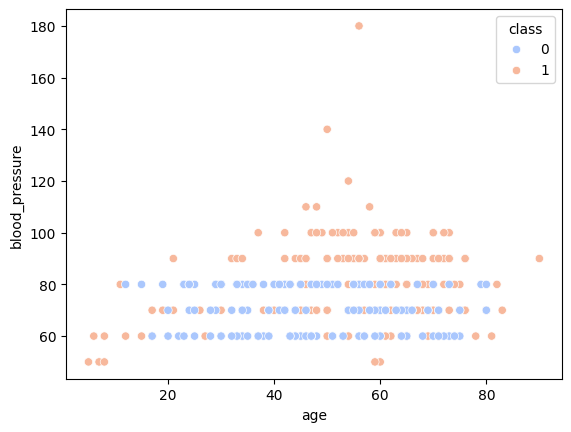

In [230]:
sns.scatterplot(x='age', y='blood_pressure', data=df, hue='class', palette='coolwarm')

In [231]:
# as age is incresing, bp is increasing
# high bp >>> more ckd

In [232]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

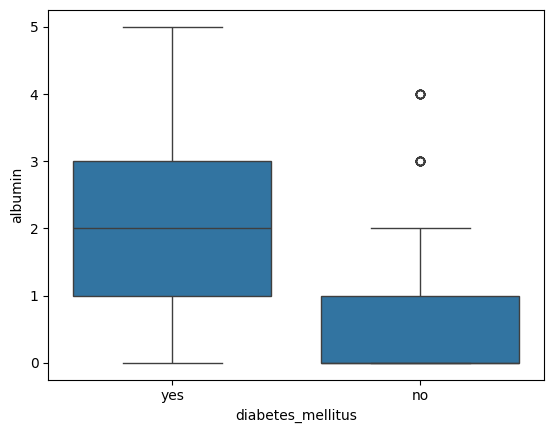

In [233]:
sns.boxplot(x='diabetes_mellitus', y='albumin', data=df)

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

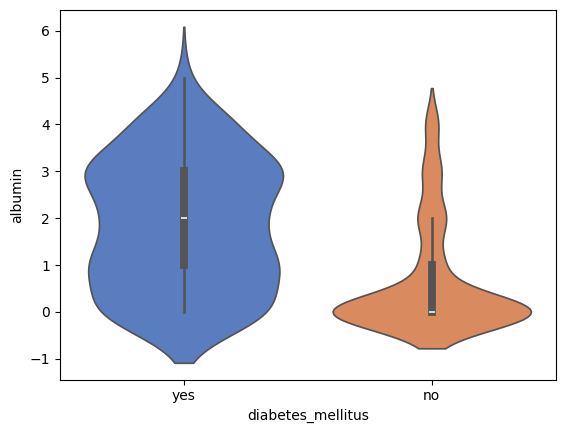

In [234]:
sns.violinplot(x='diabetes_mellitus', y='albumin', data=df, palette='muted')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

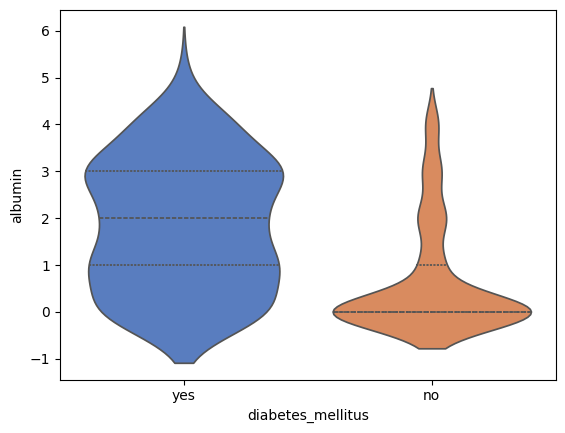

In [235]:
sns.violinplot(x='diabetes_mellitus', y='albumin', data=df, palette='muted', inner='quartile')

In [236]:
# stacked bar chart

In [237]:
diabetes_hypertension=pd.crosstab(df['diabetes_mellitus'], df['hypertension'])

In [238]:
diabetes_hypertension

hypertension,no,yes
diabetes_mellitus,,
no,220,41
yes,31,106


<Axes: xlabel='diabetes_mellitus'>

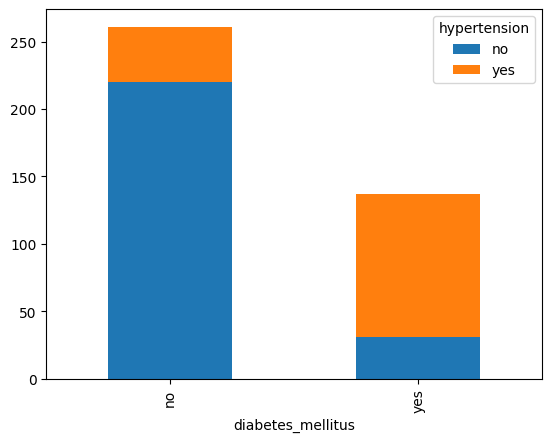

In [239]:
diabetes_hypertension.plot(kind='bar', stacked=True)

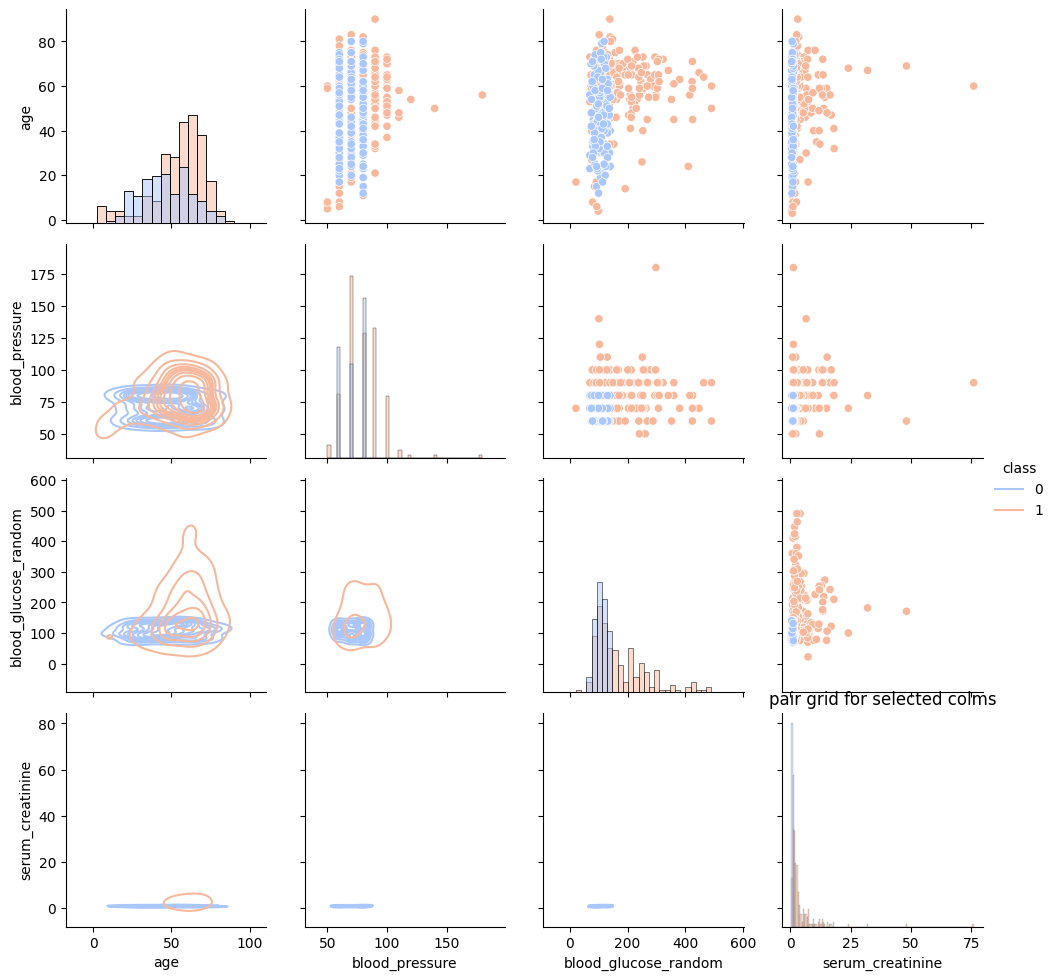

In [240]:
# multivariate analysis
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']

g=sns.PairGrid(df[cols], hue='class', palette='coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title('pair grid for selected colms')
plt.show()

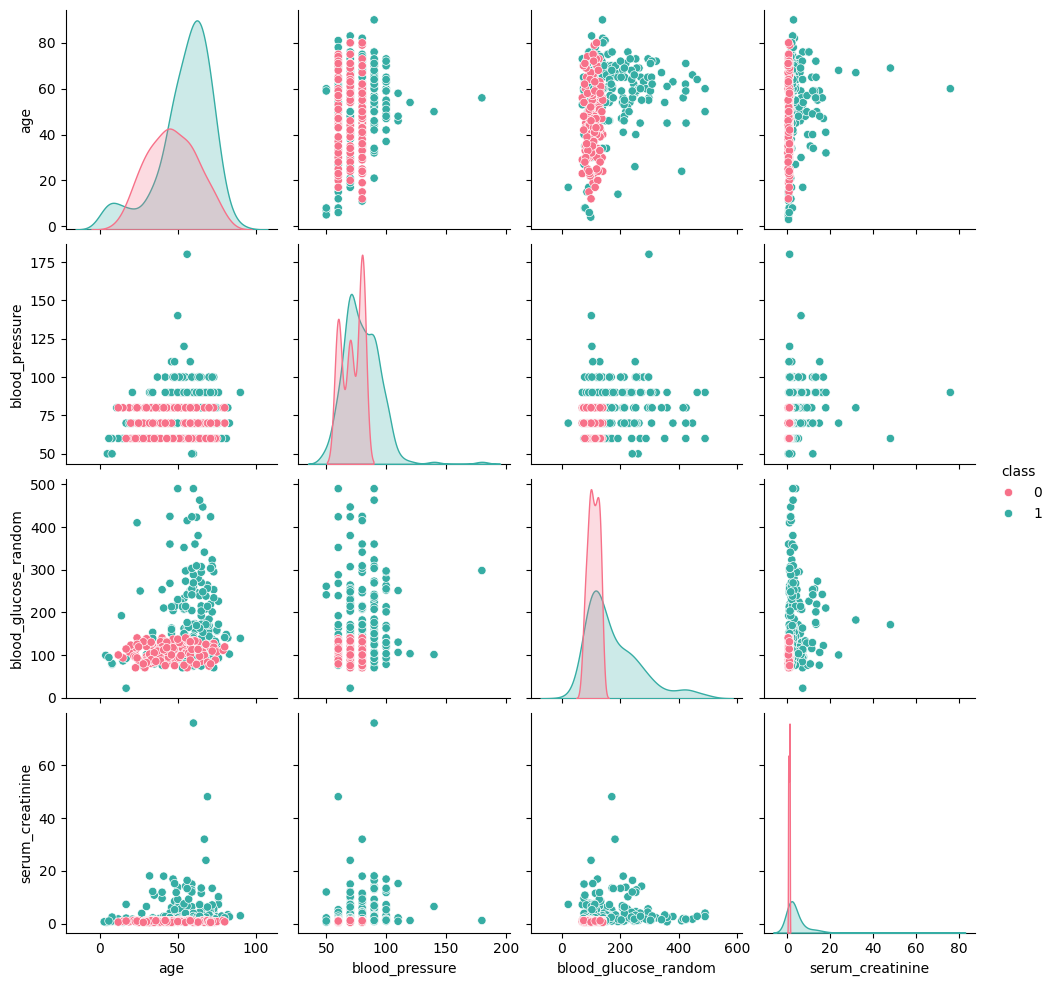

In [241]:
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
sns.pairplot(df[cols], hue='class', palette='husl')

In [242]:
df.corr(numeric_only=True)

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.344070
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.419672
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,0.380605
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,0.299969
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,-0.375674
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,0.084541


In [243]:
# insights >> if age increase by 1 unit that 15.94 % chance that blood_pressure also increase

<Axes: >

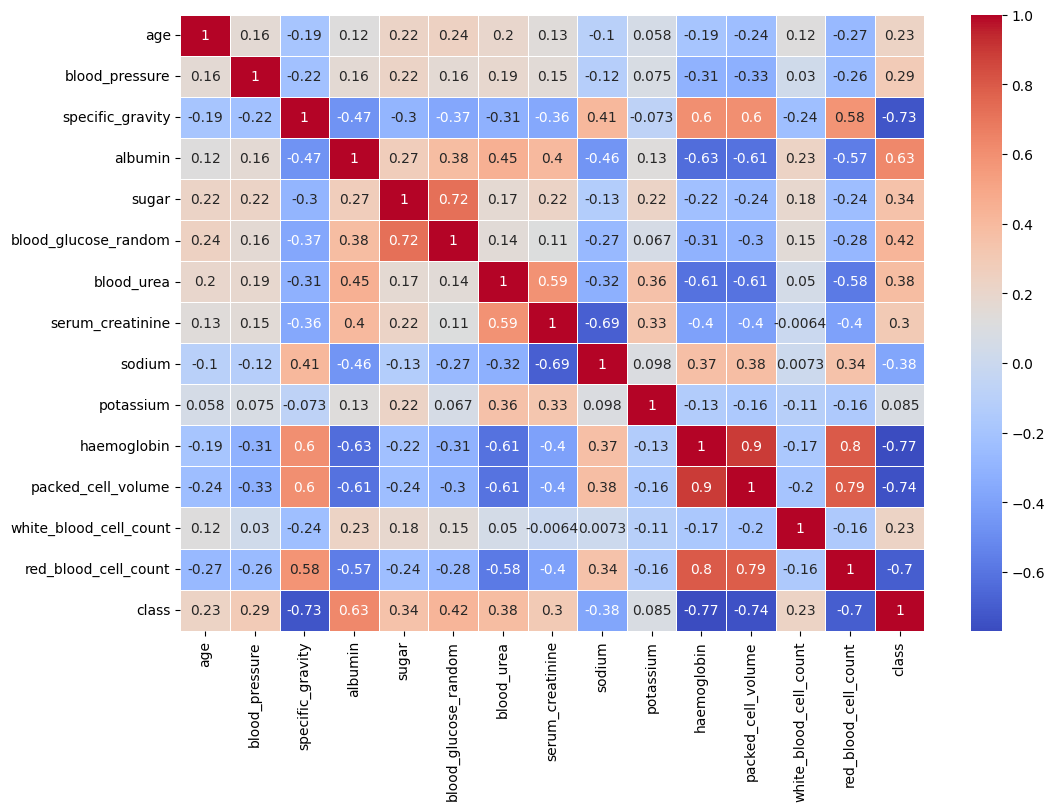

In [244]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=.5)

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

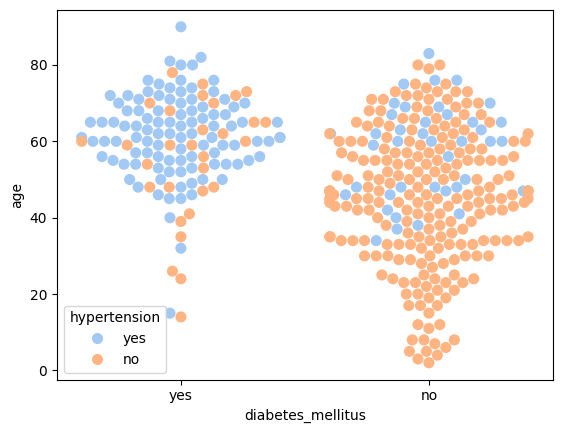

In [245]:
sns.swarmplot(x='diabetes_mellitus', y='age', hue='hypertension', data=df, palette='pastel', size=8)

In [246]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [247]:
fig=px.scatter(df, x='age', y='blood_pressure', color='class', hover_data=['serum_creatinine','haemoglobin'], title='Interactive scatterplot with hover inforamtion')
fig.show()

In [248]:
fig=px.scatter_3d(df, x='age', y='blood_pressure',z='serum_creatinine', color='class', title='3d scatterplot with hover inforamtion')
fig.show()

In [249]:
import plotly.graph_objects as go
data_corr=df.corr(numeric_only=True)
data_corr

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.344070
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.419672
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,0.380605
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,0.299969
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,-0.375674
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,0.084541


In [250]:
fig=go.Figure(data=go.Heatmap(z=data_corr.values, x=data_corr.columns, y=data_corr.index))
fig.show()

In [251]:
fig=px.scatter_3d(df, x='age', y='blood_pressure',z='serum_creatinine', color='class', title='3d scatterplot with hover inforamtion')
fig.show()

In [252]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [253]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [254]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [255]:
# replace with median

medina_values=df[num_cols].median()

In [256]:
df[num_cols]=df[num_cols].fillna(medina_values)

In [257]:
df[num_cols].isna().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [258]:
mode_values=df.mode().iloc[0]

In [259]:
mode_values

age                              55.0
blood_pressure                   80.0
specific_gravity                 1.02
albumin                           0.0
sugar                             0.0
red_blood_cells                normal
pus_cell                       normal
pus_cell_clumps            notpresent
bacteria                   notpresent
blood_glucose_random            121.0
blood_urea                       42.0
serum_creatinine                  1.2
sodium                          138.0
potassium                         4.4
haemoglobin                     12.65
packed_cell_volume               40.0
white_blood_cell_count         8000.0
red_blood_cell_count              4.8
hypertension                       no
diabetes_mellitus                  no
coronary_artery_disease            no
appetite                         good
peda_edema                         no
aanemia                            no
class                               1
Name: 0, dtype: object

In [260]:
df[cat_cols]=df[cat_cols].fillna(mode_values)

In [261]:
df[cat_cols].isna().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [262]:
df.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [263]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                        int64
dtype: object

In [264]:
# data encoding

In [265]:
from sklearn.preprocessing import LabelEncoder

In [266]:
label_encoder=LabelEncoder()

In [267]:
for col in cat_cols: 
    df[col]=label_encoder.fit_transform(df[col])

In [268]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [269]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [270]:
x=df.drop('class',axis=1 )
y=df['class']

In [271]:
x

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [272]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [ ]:
# train- test split and ml model training